# An Extensive Exploratory Data Analysis on Apple Stock Prices

### Team Members
- Group member 1
    - Name: Adan Ordonez
    - Email: aeo49@drexel.edu
- Group member 2
    - Name: Priyanka Patil
    - Email: pp673@drexel.edu
- Group member 3
    - Name: Tyler Brenner
    - Email: tb3327@drexel.edu
- Group member 4
    - Name: Vijval Vemula
    - Email: vv354@drexel.edu

### Background for our analysis:

We have chosen to perform an extensive EDA on the stock prices of the apple company from 1980 - 2022, for which the CSV file is available [here](https://drexel0-my.sharepoint.com/:x:/r/personal/vv354_drexel_edu/_layouts/15/Doc.aspx?sourcedoc=%7BEA5B7A5B-F415-4975-BE7A-7A4330864DD3%7D&file=AAPL%201.xlsx&action=default&mobileredirect=true). We downloaded the file from [Kaggle](https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021). This analysis of the Apple stock price data aims to provide valuable insights and support for investors, financial analysts, and traders. By visualizing the stock price trends, calculating summary statistics, and examining daily returns, it helps in understanding the historical performance and volatility of Apple stock. By analyzing significant events and outlier detection, the analysis contributes to making informed investment decisions. Moreover, volatility analysis and technical indicators provide additional tools for risk assessment and identifying potential buy/sell signals. Overall, this comprehensive analysis assists stakeholders in better understanding the historical behavior of Apple stock, potentially identifying profitable opportunities, and mitigating risks in their investment strategies. 

In [1]:
%autosave 60

Autosaving every 60 seconds


### Initial EDA:

Our initial analysis on the graph would be getting a sense of the data we have and exploring its statistical traits. Here are some questions we expect to be answered from this approach:

*1. What does the overall data structure look like?*
   
*2. Are there any missing values in the dataset?*
   
*3. What are the summary statistics of the numerical columns?*
  
*4. What is the general trend of the stock's closing price over time?*

*5. How do the Open, High, Low, and Close prices vary over time?*

*6. What does the volume of trades look like over time?*



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "apple_stock_prices.csv"

In [4]:

data = pd.read_csv(path, parse_dates = ["Date"], index_col = "Date")
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
12-12-1980    0.128348    0.128906    0.128348    0.128348    0.100178   
15-12-1980    0.122210    0.122210    0.121652    0.121652    0.094952   
16-12-1980    0.113281    0.113281    0.112723    0.112723    0.087983   
17-12-1980    0.115513    0.116071    0.115513    0.115513    0.090160   
18-12-1980    0.118862    0.119420    0.118862    0.118862    0.092774   
...                ...         ...         ...         ...         ...   
13-06-2022  132.869995  135.199997  131.440002  131.880005  131.880005   
14-06-2022  133.130005  133.889999  131.479996  132.759995  132.759995   
15-06-2022  134.289993  137.339996  132.160004  135.429993  135.429993   
16-06-2022  132.080002  132.389999  129.039993  130.059998  130.059998   
17-06-2022  130.070007  133.080002  129.809998  131.559998  131.559998   

               Volume  
Date                   
12-12-1980  469033600  
15-12-1980  175884800  
16-12-1980  105728000  
17-12-1980   86441600  
18-12-1980   73449600  
...               ...  
13-06-2022  122207100  
14-06-2022   84784300  
15-06-2022   91533000  
16-06-2022  108123900  
17-06-2022  134118500  

[10468 rows x 6 columns]

In [5]:
data.shape

(10468, 6)

In [6]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data.describe()

Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09

In [8]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
data.index

Index(['12-12-1980', '15-12-1980', '16-12-1980', '17-12-1980', '18-12-1980',
       '19-12-1980', '22-12-1980', '23-12-1980', '24-12-1980', '26-12-1980',
       ...
       '06-06-2022', '07-06-2022', '08-06-2022', '09-06-2022', '10-06-2022',
       '13-06-2022', '14-06-2022', '15-06-2022', '16-06-2022', '17-06-2022'],
      dtype='object', name='Date', length=10468)

In [10]:
data.index = pd.to_datetime(data.index, format = "mixed")

data.index = pd.to_datetime(data.index, format = "%y-%m-%d")
data.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2022-06-06', '2022-07-06', '2022-08-06', '2022-09-06',
               '2022-10-06', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17'],
              dtype='datetime64[ns]', name='Date', length=10468, freq=None)

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
1980-12-19    0.126116    0.126674    0.126116    0.126116    0.098436   
1980-12-22    0.132254    0.132813    0.132254    0.132254    0.103227   
1980-12-23    0.137835    0.138393    0.137835    0.137835    0.107583   
1980-12-24    0.145089    0.145647    0.145089    0.145089    0.113245   
1980-12-26    0.158482    0.159040    0.158482    0.158482    0.123699   
1980-12-29    0.160714    0.161272    0.160714    0.160714    0.125441   
1980-12-30    0.157366    0.157366    0.156808    0.156808    0.122392   
1980-12-31    0.152902    0.152902    0.152344    0.152344    0.118908   
1981-02-01    0.154018    0.155134    0.154018    0.154018    0.120214   
1981-05-01    0.151228    0.151228    0.150670    0.150670    0.117601   
1981-06-01    0.144531    0.144531    0.143973    0.143973    0.112374   
1981-07-01    0.138393    0.138393    0.137835    0.137835    0.107583   
1981-08-01    0.135603    0.135603    0.135045    0.135045    0.105406   
1981-09-01    0.142299    0.142857    0.142299    0.142299    0.111067   
1981-12-01    0.142299    0.142299    0.141183    0.141183    0.110196   
1981-01-13    0.136719    0.136719    0.136161    0.136161    0.106277   
1981-01-14    0.136719    0.137277    0.136719    0.136719    0.106712   
1981-01-15    0.139509    0.140625    0.139509    0.139509    0.108890   
1981-01-16    0.138951    0.138951    0.138393    0.138393    0.108019   
1981-01-19    0.146763    0.147321    0.146763    0.146763    0.114552   
1981-01-20    0.142857    0.142857    0.142299    0.142299    0.111067   
1981-01-21    0.145089    0.146205    0.145089    0.145089    0.113245   
1981-01-22    0.146763    0.147879    0.146763    0.146763    0.114552   
1981-01-23    0.146763    0.147321    0.146205    0.146205    0.114116   
1981-01-26    0.144531    0.144531    0.143973    0.143973    0.112374   
1981-01-27    0.143973    0.143973    0.142857    0.142857    0.111503   
1981-01-28    0.138951    0.138951    0.138393    0.138393    0.108019   
1981-01-29    0.133929    0.133929    0.133371    0.133371    0.104099   
1981-01-30    0.127232    0.127232    0.126116    0.126116    0.098436   
1981-02-02    0.119420    0.119420    0.118862    0.118862    0.092774   
1981-03-02    0.123326    0.123884    0.123326    0.123326    0.096259   
1981-04-02    0.127790    0.128348    0.127790    0.127790    0.099743   
1981-05-02    0.127790    0.128906    0.127790    0.127790    0.099743   
1981-06-02    0.128348    0.128906    0.128348    0.128348    0.100178   
1981-09-02    0.122768    0.122768    0.121652    0.121652    0.094952   
1981-10-02    0.121652    0.122210    0.121652    0.121652    0.094952   
1981-11-02    0.118304    0.118304    0.117746    0.117746    0.091903   
1981-12-02    0.117188    0.117188    0.116629    0.116629    0.091031   
1981-02-13    0.114955    0.114955    0.113839    0.113839    0.088854   
1981-02-17    0.116629    0.117188    0.116629    0.116629    0.091031   
1981-02-18    0.121652    0.122768    0.121652    0.121652    0.094952   
1981-02-19    0.114955    0.114955    0.114397    0.114397    0.089289   
1981-02-20    0.108817    0.108817    0.108259    0.108259    0.084499   
1981-02-23    0.109933    0.110491    0.109933    0.109933    0.085805   
1981-02-24    0.107143    0.107143    0.106027    0.106027    0.082756   
1981-02-25    0.112723    0.113281    0.112723    0.112723    0.087983   
1981-02-26    0.114397    0.114955    0.114397    0.114397    0.089289   
1981-02-27    0.118304

In [12]:
data = data.sort_index(axis = 0)
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
1980-12-19    0.126116    0.126674    0.126116    0.126116    0.098436   
1980-12-22    0.132254    0.132813    0.132254    0.132254    0.103227   
1980-12-23    0.137835    0.138393    0.137835    0.137835    0.107583   
1980-12-24    0.145089    0.145647    0.145089    0.145089    0.113245   
1980-12-26    0.158482    0.159040    0.158482    0.158482    0.123699   
1980-12-29    0.160714    0.161272    0.160714    0.160714    0.125441   
1980-12-30    0.157366    0.157366    0.156808    0.156808    0.122392   
1980-12-31    0.152902    0.152902    0.152344    0.152344    0.118908   
1981-01-04    0.108817    0.108817    0.108259    0.108259    0.084499   
1981-01-05    0.126674    0.127790    0.126674    0.126674    0.098872   
1981-01-06    0.147879    0.148438    0.147879    0.147879    0.115423   
1981-01-07    0.115513    0.115513    0.114955    0.114955    0.089725   
1981-01-09    0.095424    0.095982    0.095424    0.095424    0.074481   
1981-01-10    0.068080    0.068638    0.068080    0.068080    0.053138   
1981-01-12    0.083147    0.083705    0.083147    0.083147    0.064898   
1981-01-13    0.136719    0.136719    0.136161    0.136161    0.106277   
1981-01-14    0.136719    0.137277    0.136719    0.136719    0.106712   
1981-01-15    0.139509    0.140625    0.139509    0.139509    0.108890   
1981-01-16    0.138951    0.138951    0.138393    0.138393    0.108019   
1981-01-19    0.146763    0.147321    0.146763    0.146763    0.114552   
1981-01-20    0.142857    0.142857    0.142299    0.142299    0.111067   
1981-01-21    0.145089    0.146205    0.145089    0.145089    0.113245   
1981-01-22    0.146763    0.147879    0.146763    0.146763    0.114552   
1981-01-23    0.146763    0.147321    0.146205    0.146205    0.114116   
1981-01-26    0.144531    0.144531    0.143973    0.143973    0.112374   
1981-01-27    0.143973    0.143973    0.142857    0.142857    0.111503   
1981-01-28    0.138951    0.138951    0.138393    0.138393    0.108019   
1981-01-29    0.133929    0.133929    0.133371    0.133371    0.104099   
1981-01-30    0.127232    0.127232    0.126116    0.126116    0.098436   
1981-02-01    0.154018    0.155134    0.154018    0.154018    0.120214   
1981-02-02    0.119420    0.119420    0.118862    0.118862    0.092774   
1981-02-03    0.118862    0.119420    0.118862    0.118862    0.092774   
1981-02-04    0.117746    0.118304    0.117746    0.117746    0.091903   
1981-02-06    0.141183    0.141183    0.140625    0.140625    0.109761   
1981-02-07    0.114955    0.115513    0.114955    0.114955    0.089725   
1981-02-09    0.097098    0.097656    0.097098    0.097098    0.075787   
1981-02-10    0.073661    0.074219    0.073661    0.073661    0.057494   
1981-02-11    0.089286    0.089844    0.089286    0.089286    0.069690   
1981-02-12    0.083705    0.084263    0.083705    0.083705    0.065334   
1981-02-13    0.114955    0.114955    0.113839    0.113839    0.088854   
1981-02-17    0.116629    0.117188    0.116629    0.116629    0.091031   
1981-02-18    0.121652    0.122768    0.121652    0.121652    0.094952   
1981-02-19    0.114955    0.114955    0.114397    0.114397    0.089289   
1981-02-20    0.108817    0.108817    0.108259    0.108259    0.084499   
1981-02-23    0.109933    0.110491    0.109933    0.109933    0.085805   
1981-02-24    0.107143    0.107143    0.106027    0.106027    0.082756   
1981-02-25    0.112723    0.113281    0.112723    0.112723    0.087983   
1981-02-26    0.114397

In [13]:
data.apply(pd.isnull).sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


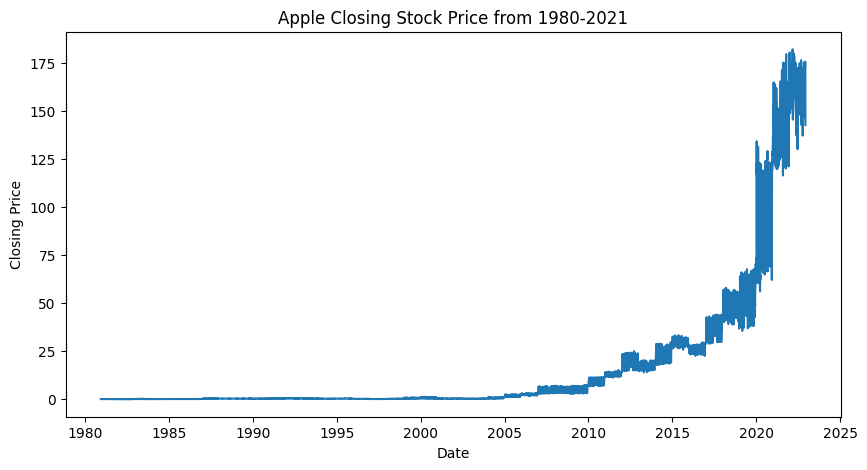

In [15]:
plt.figure(figsize=(10, 5))  # Adjust the figure size to make it wider
# Get the adjusted closing price of Apple stock

# Plot the time series graph
bar_width = 1.0
plt.plot(data.index,data["Close"],label='Close')
plt.title("Apple Closing Stock Price from 1980-2021")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

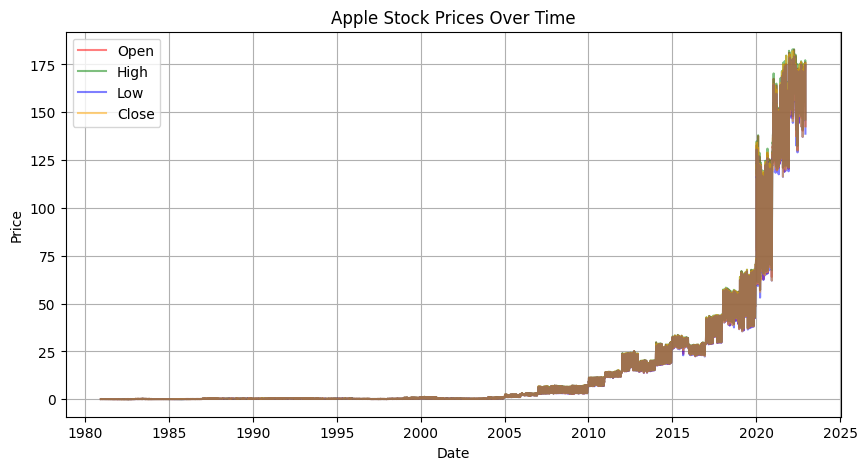

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Open'], label='Open', color='r', alpha=0.5)
plt.plot(data.index, data['High'], label='High', color='g', alpha=0.5)
plt.plot(data.index, data['Low'], label='Low', color='b', alpha=0.5)
plt.plot(data.index, data['Close'], label='Close', color='orange', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

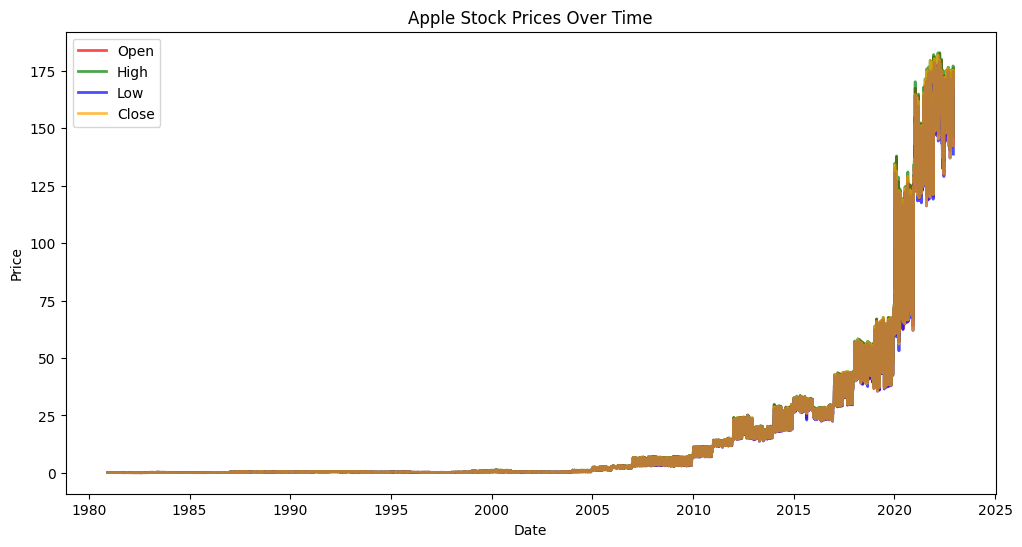

In [17]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to make it broader

plt.plot(data.index, data['Open'], label='Open', color='r', alpha=0.7, linewidth=2)
plt.plot(data.index, data['High'], label='High', color='g', alpha=0.7, linewidth=2)
plt.plot(data.index, data['Low'], label='Low', color='b', alpha=0.7, linewidth=2)
plt.plot(data.index, data['Close'], label='Close', color='orange', alpha=0.7, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.grid(False)
plt.show()


The rapid increase in Apple's stock price from 2010 to 2022 can be attributed to several key factors:  

__1. *Strong Product Portfolio*__: Apple introduced several successful products during this period, including the iPhone, iPad, MacBook, and Apple Watch. These products generated significant revenue and contributed to the company's overall growth.  

__2. *iPhone Sales*__: The iPhone, in particular, played a crucial role in Apple's growth story. It became one of the most popular smartphones globally, leading to substantial sales and profits for the company.  

__3. *Stock Splits*__: In August 2020, Apple implemented a 4-for-1 stock split. Stock splits increase the number of shares outstanding while decreasing the share price proportionally. This move made individual shares more affordable to investors and likely contributed to increased demand.  

__4. *Market Sentiment*__: Positive market sentiment and investor optimism about the company's future prospects also played a role in driving up the stock price. 

__5. *Innovative Leadership*__: Under the leadership of Steve Jobs, and later Tim Cook, Apple continued to innovate and maintain its reputation as a leading technology company. 

### Data Visualization:

#### 1. Candlestick Chart:
A candlestick chart displays the open, close, high, and low prices for each trading period (e.g., daily or weekly) in a visually informative way. It is particularly useful for showing price movements within a specified time frame. 

__NOTE__: We need a special library names `mplfinance`, that we need to install, inorder to generat candle stick graphs for financial data.

Please run `!pip3 install mplfinance` in your notebook to install it. We have already installed it and its version is shown below.

In [18]:
!pip3 show mplfinance

Name: mplfinance
Version: 0.12.10b0
Summary: Utilities for the visualization, and visual analysis, of financial data
Home-page: http://github.com/matplotlib/mplfinance
Author: MPL Developers
Author-email: matplotlib-users@python.org
License: BSD-style
Location: C:\Users\venkat\anaconda3\Lib\site-packages
Requires: matplotlib, pandas
Required-by: 


In [19]:
type(data.index) # Rechecking the type of the index of data. It is datetimeindex

pandas.core.indexes.datetimes.DatetimeIndex

C:\Users\venkat\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


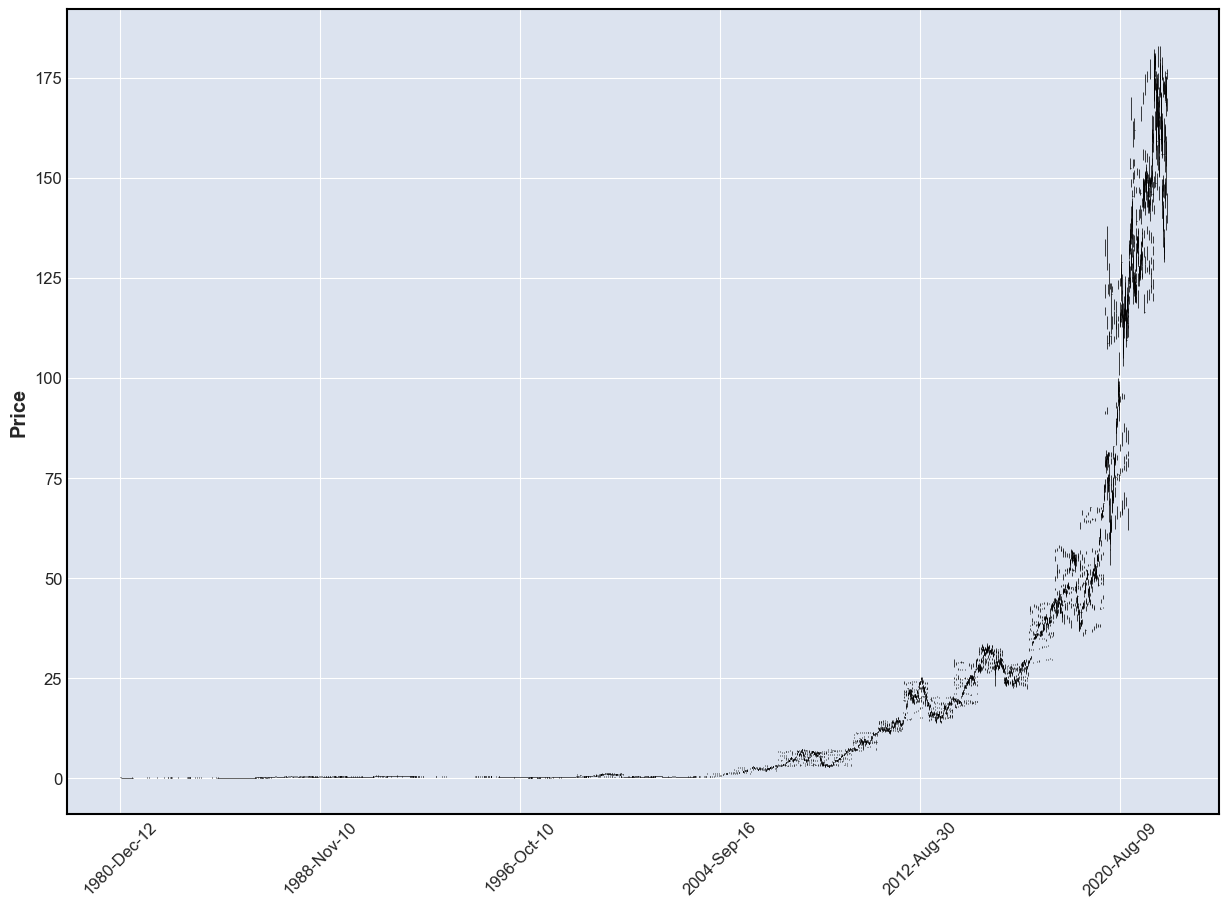

In [20]:
import mplfinance as mpl

mpl.plot(data, figscale = 2.0)
